## Problem Statement:
#### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


**Please note that there are two target variables here:**

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [5]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',25)

import warnings
warnings.filterwarnings('ignore')

In [6]:
#import the dataset
data= pd.read_csv("Temperature_dataset.csv")
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [7]:
#shape of the dataset
data.shape

(7752, 25)

In [8]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- no of rows- 7752
- no of columns- 25

it seems there are some missing value in the datset. Most of the datatypes are integer.

In [9]:
#lets neglect if there's any duplicates of observation
data.drop_duplicates(inplace=True)
data.shape

(7752, 25)

In [10]:
#checking if there's any missing values
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are some minimal values in the dataset, Since there are many observation. we can remove the observations which has null values.

In [11]:
data.dropna(inplace=True)
data.shape

(7588, 25)

In [12]:
#rechecking
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
print('Percentage of data removed due to missing values: ',((7752-7588)/7752)*100,"%")

Percentage of data removed due to missing values:  2.1155830753353975 %


In [16]:
#Descriptive statistics
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [21]:
#converting the dates datatype from object to pandas datetime
data["Day"] = pd.to_datetime(data.Date).dt.day
data["Month"] = pd.to_datetime(data.Date).dt.month
data["Year"] = pd.to_datetime(data.Date).dt.year

data.drop(columns='Date',inplace=True)
data

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


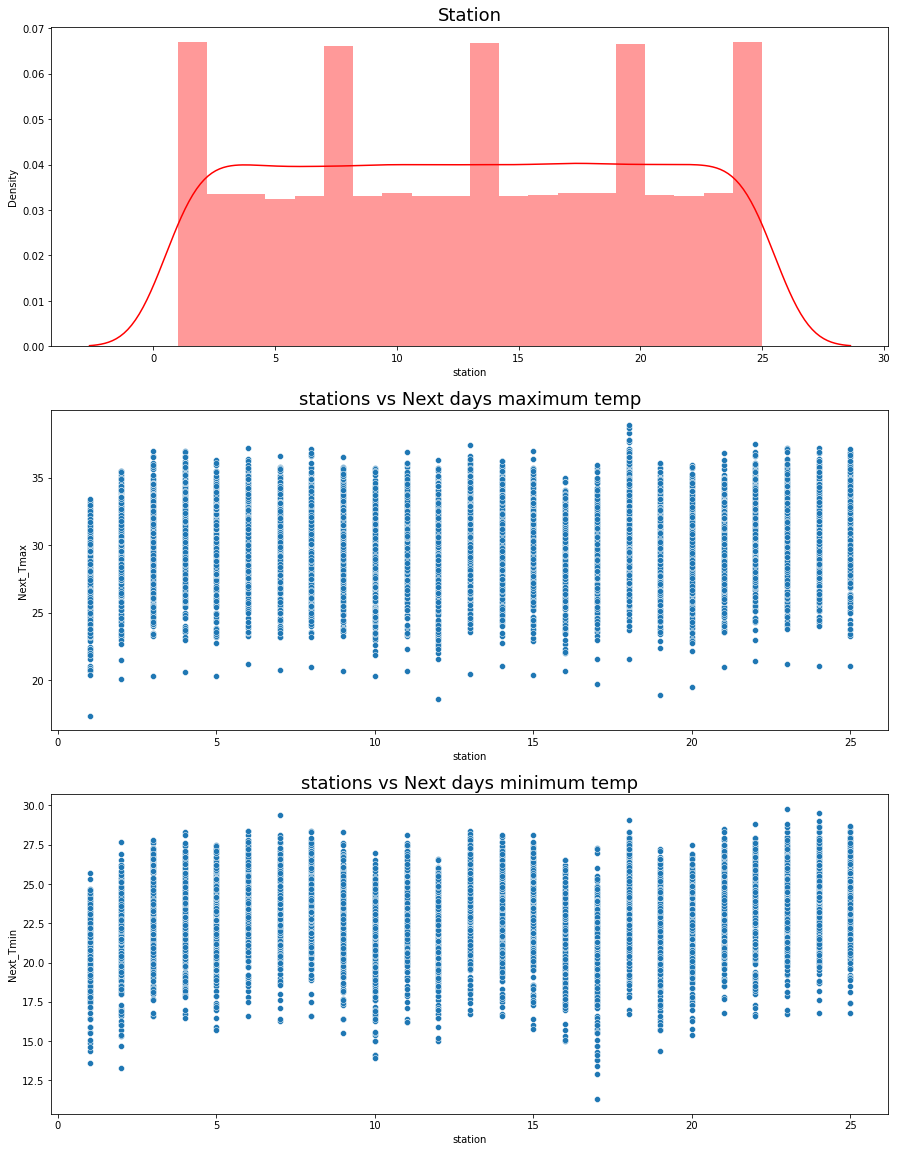

In [34]:
#visualising the individual features to understand the pattern
plt.figure(figsize=(15,20),facecolor='white')
plt.subplot(3,1,1)
sns.distplot(data.station,color='red')
plt.title("Station",fontsize=18)
plt.subplot(3,1,2)
sns.scatterplot(x='station',y='Next_Tmax',data=data)
plt.title("stations vs Next days maximum temp",fontsize=18)
plt.subplot(3,1,3)
sns.scatterplot(x='station',y='Next_Tmin',data=data)
plt.title("stations vs Next days minimum temp",fontsize=18)
plt.show()

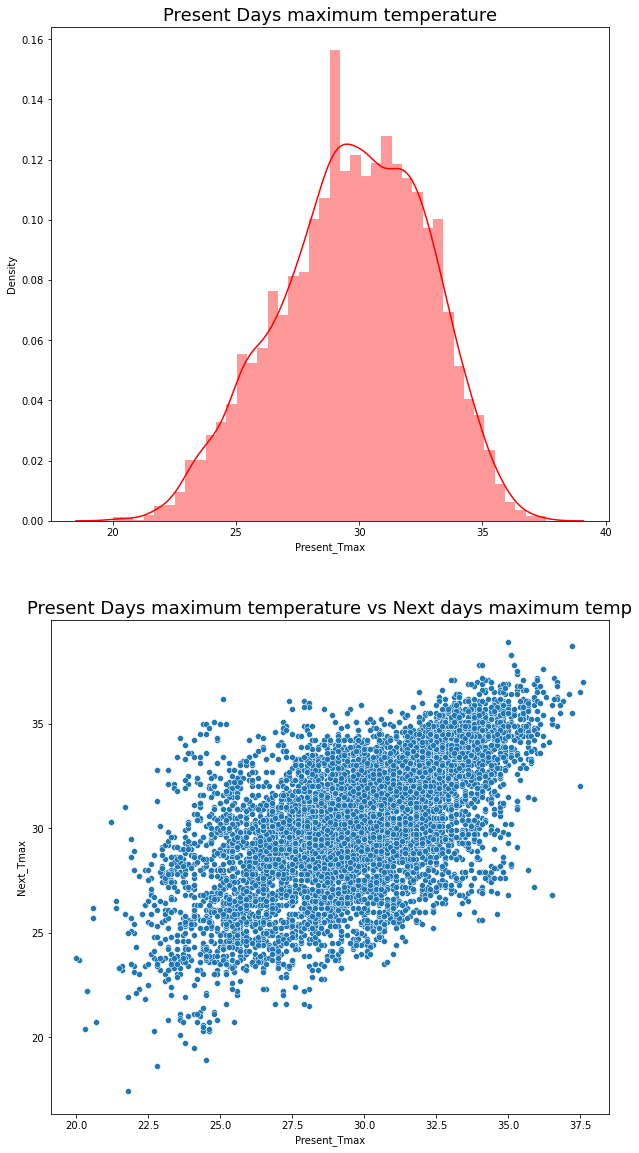

In [38]:
plt.figure(figsize=(10,20),facecolor='white')
plt.subplot(2,1,1)
sns.distplot(data.Present_Tmax,color='red')
plt.title("Present Days maximum temperature",fontsize=18)
plt.subplot(2,1,2)
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=data)
plt.title("Present Days maximum temperature vs Next days maximum temp",fontsize=18)

plt.show()

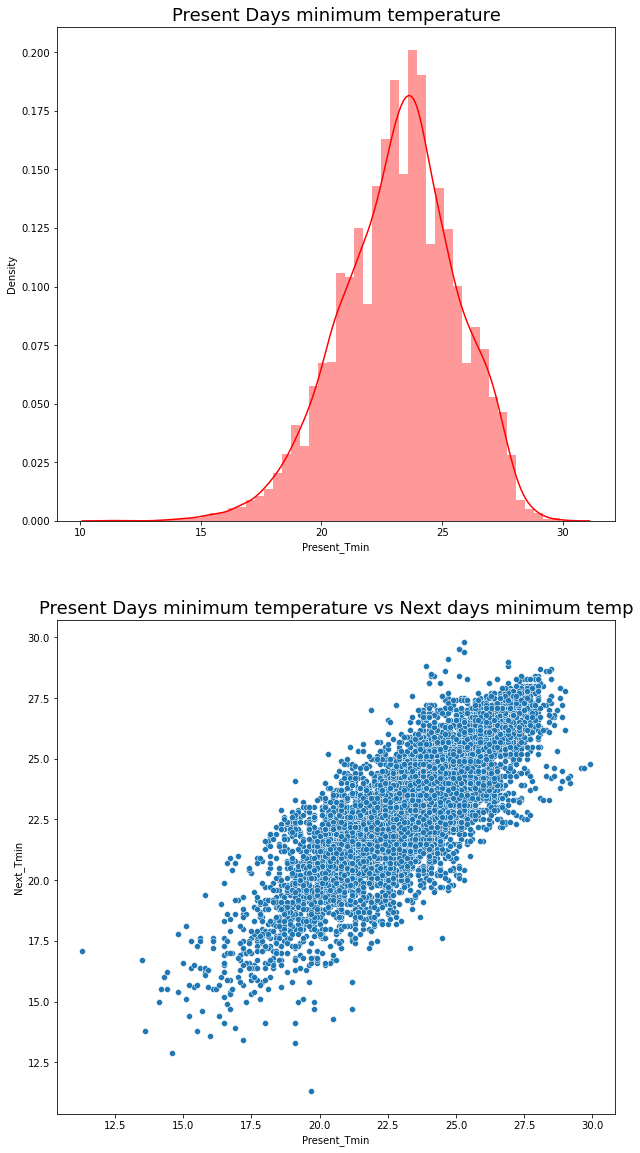

In [39]:
plt.figure(figsize=(10,20),facecolor='white')
plt.subplot(2,1,1)
sns.distplot(data.Present_Tmin,color='red')
plt.title("Present Days minimum temperature",fontsize=18)
plt.subplot(2,1,2)
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=data)
plt.title("Present Days minimum temperature vs Next days minimum temp",fontsize=18)

plt.show()

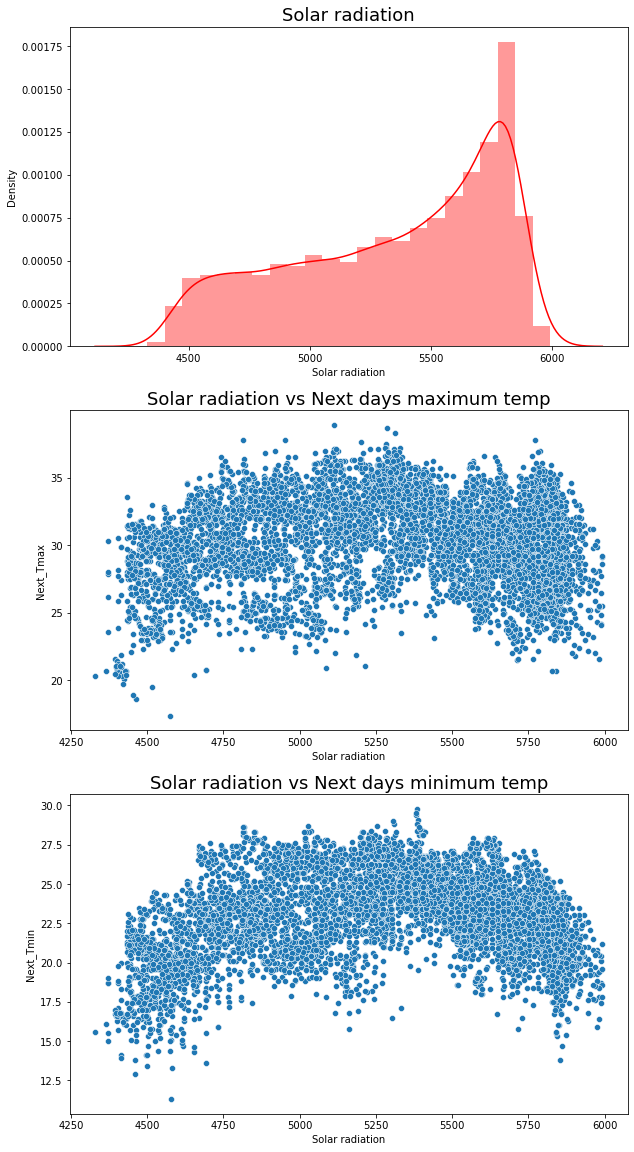

In [43]:
plt.figure(figsize=(10,20),facecolor='white')
plt.subplot(3,1,1)
sns.distplot(data['Solar radiation'],color='red')
plt.title("Solar radiation",fontsize=18)
plt.subplot(3,1,2)
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=data)
plt.title("Solar radiation vs Next days maximum temp",fontsize=18)
plt.subplot(3,1,3)
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=data)
plt.title("Solar radiation vs Next days minimum temp",fontsize=18)
plt.show()

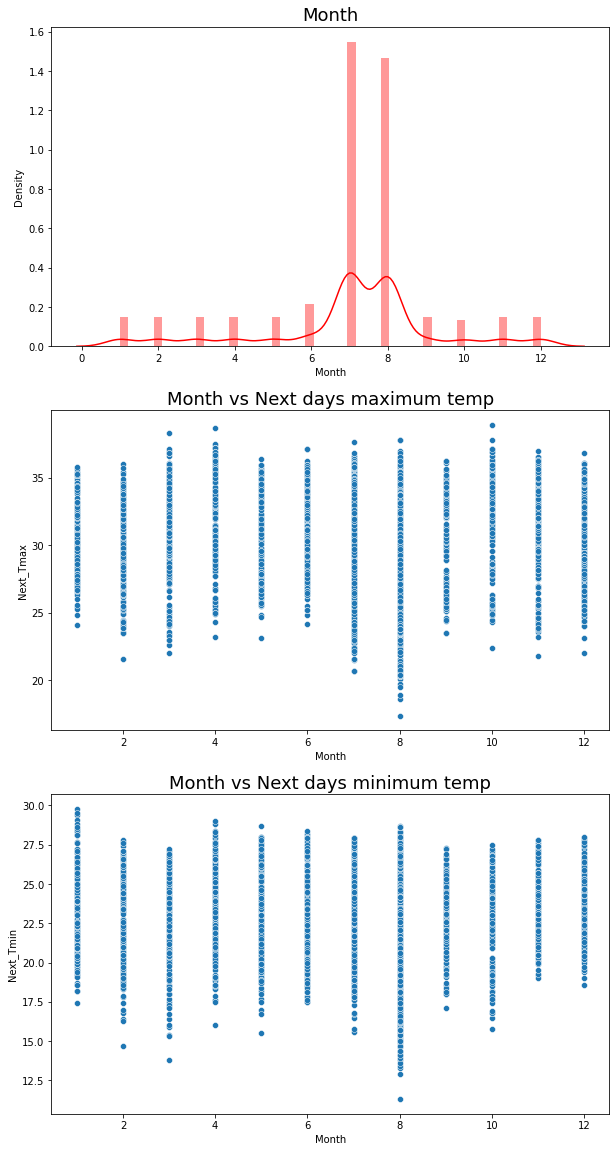

In [44]:
plt.figure(figsize=(10,20),facecolor='white')
plt.subplot(3,1,1)
sns.distplot(data['Month'],color='red')
plt.title("Month",fontsize=18)
plt.subplot(3,1,2)
sns.scatterplot(x='Month',y='Next_Tmax',data=data)
plt.title("Month vs Next days maximum temp",fontsize=18)
plt.subplot(3,1,3)
sns.scatterplot(x='Month',y='Next_Tmin',data=data)
plt.title("Month vs Next days minimum temp",fontsize=18)
plt.show()

In [80]:
df

,Month,Present_Tmax,Next_Tmax
0,1,30.763052,NaN
1,2,29.600407,30.134137
2,3,29.429150,29.977642
3,4,30.315323,30.879757
4,5,30.733740,31.300000
5,6,30.024167,30.989431
6,7,29.587616,30.836944
7,8,29.329231,30.266331
8,9,30.806883,29.775715
9,10,29.724775,30.211741


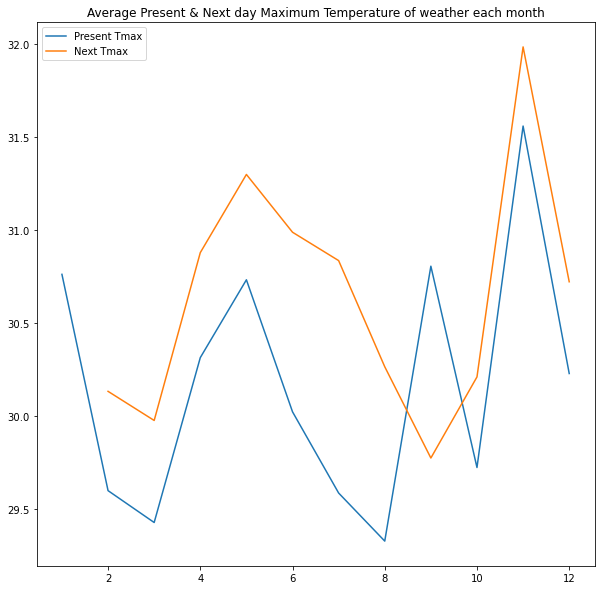

In [89]:
df=pd.DataFrame(data.groupby(['Month'])['Present_Tmax'].mean())
df.reset_index(inplace=True)
df['Next_Tmax']=data.groupby(['Month'])['Next_Tmax'].mean()
plt.figure(figsize=(10,10),facecolor='white')
plt.plot(df['Month'],df['Present_Tmax'], Label='Present Tmax')
plt.plot(df['Month'],df['Next_Tmax'], Label='Next Tmax')
plt.title("Average Present & Next day Maximum Temperature of weather each month",fontsize=12)
plt.legend()
plt.show()

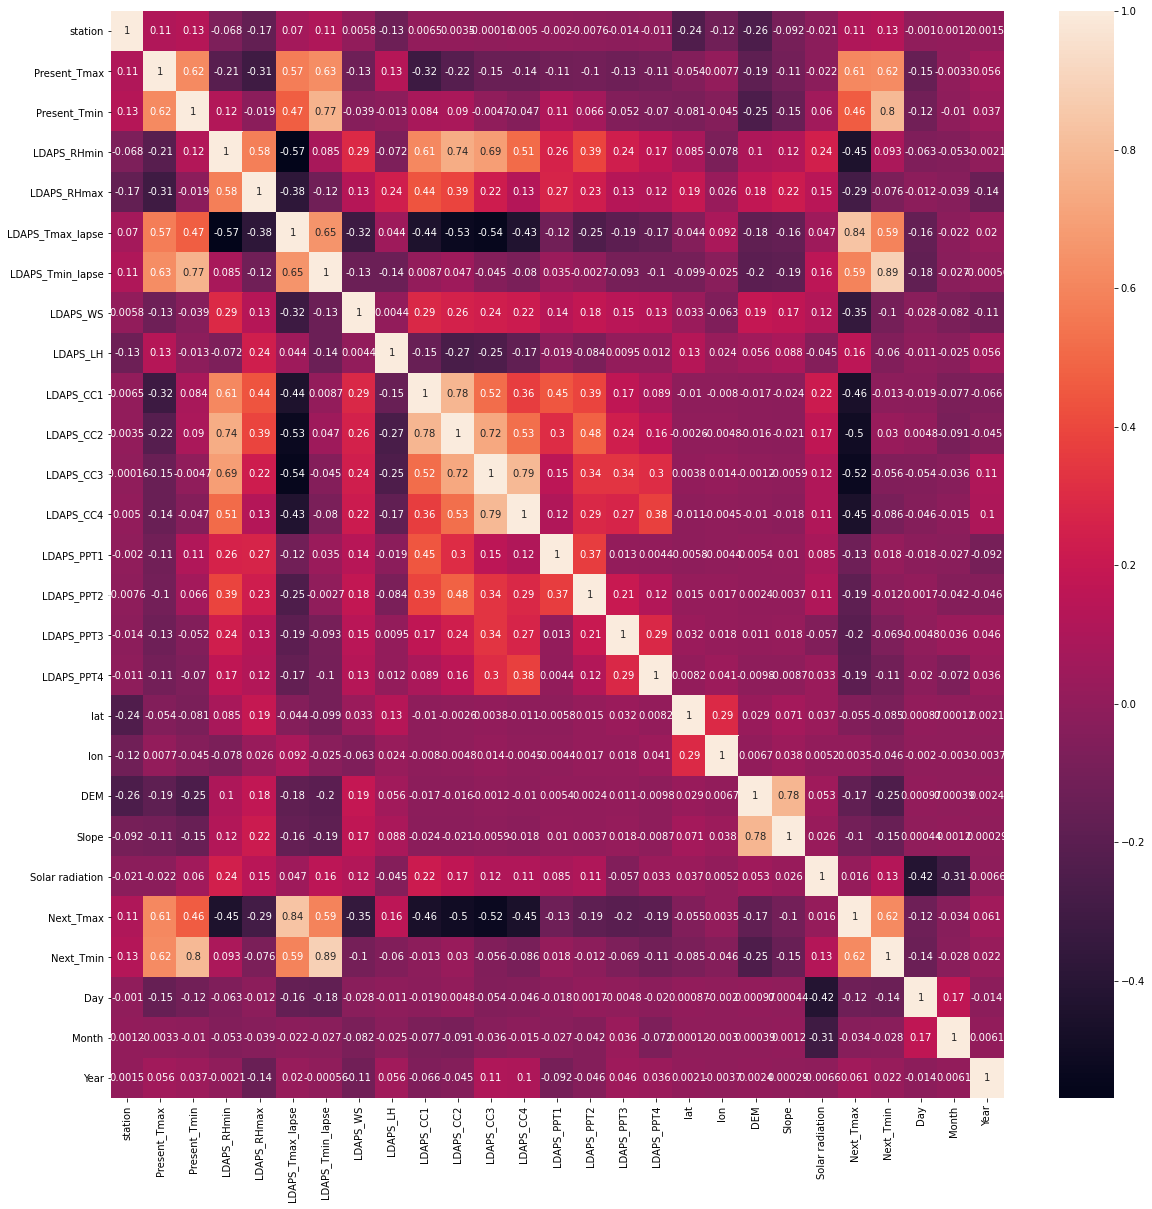

In [90]:
#seeing the correlation with the target variable (region & Average Price) 
#and multicollinearity between the features.
corr_data= data.corr()
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(corr_data,annot=True)
plt.show()

There are some features which are multicollinear.

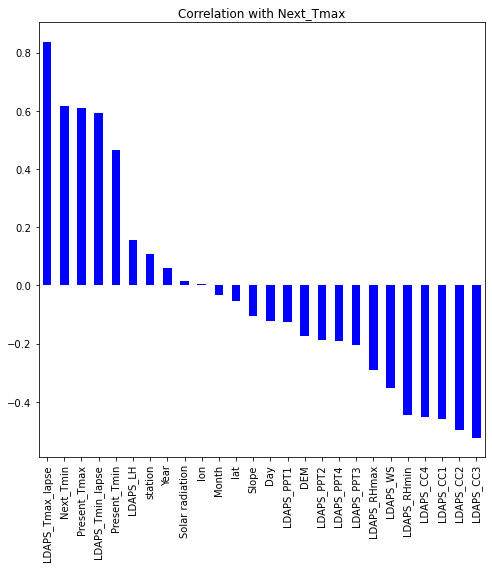

In [91]:
#visualizin the correlation with the target variable from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.Next_Tmax.sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='b',title='Correlation with Next_Tmax')
plt.show()

- 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','Present_Tmax', 'Present_Tmin', LDAPS_LH
- LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_WS','station','Year' are positively correlate.
'LDAPS_CC1','LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' are negatively correlated with the Next days maximum temperature.

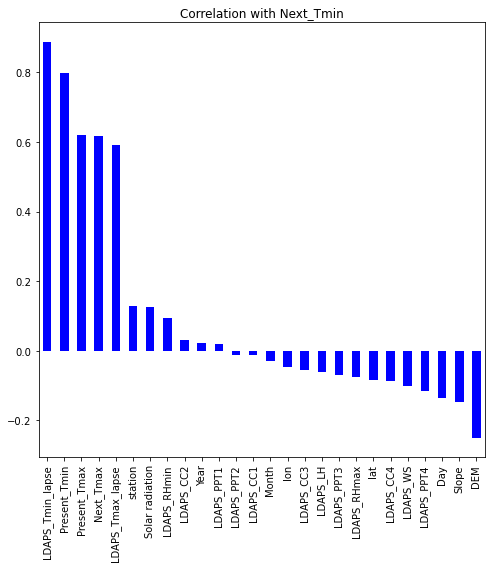

In [93]:
#visualizin the correlation with the target variable from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.Next_Tmin.sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='b',title='Correlation with Next_Tmin')
plt.show()

All the correlation with the target variable for next days minimum temperature is same as before.

In [96]:
#splitting the independent and dependent variables
x= data.drop(columns=['Next_Tmax','Next_Tmin'])
y_max= data.Next_Tmax
y_min= data.Next_Tmin

In [97]:
#standardising each features within a range using standard scaler
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x= scalar.fit_transform(x)
x

array([[-1.66460654, -0.35331763, -0.74802891, ...,  1.66286062,
        -0.47636887, -1.41176669],
       [-1.52605214,  0.72513836, -0.66472063, ...,  1.66286062,
        -0.47636887, -1.41176669],
       [-1.38749775,  0.62403311,  0.0433998 , ...,  1.66286062,
        -0.47636887, -1.41176669],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ...,  1.66286062,
         0.41559584,  1.42353686],
       [ 1.52214457, -2.17321212, -2.28923218, ...,  1.66286062,
         0.41559584,  1.42353686],
       [ 1.66069897, -2.20691387, -2.41419461, ...,  1.66286062,
         0.41559584,  1.42353686]])

In [98]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_maxtrain,y_maxtest,y_mintrain,y_mintest= train_test_split(x,y_max,y_min,test_size=0.25,random_state=49)

In [110]:
#best cross fold value
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lf= LinearRegression()
for j in range(2,10):
    cvs1= cross_val_score(lf,x,y_max,cv=j)
    cvs2= cross_val_score(lf,x,y_min,cv=j)
    cvs_mean1= cvs1.mean()
    cvs_mean2= cvs2.mean()
    print(f'At cross fold {j} cross value score for max is {cvs_mean1}\nAt cross fold {j} cross value score for min is {cvs_mean2}')
    print("-"*50)

At cross fold 2 cross value score for max is 0.593274071264948
At cross fold 2 cross value score for min is 0.8052275398935176
--------------------------------------------------
At cross fold 3 cross value score for max is 0.6879966866359722
At cross fold 3 cross value score for min is 0.7799362225517653
--------------------------------------------------
At cross fold 4 cross value score for max is 0.7039004729658087
At cross fold 4 cross value score for min is 0.7794157746751922
--------------------------------------------------
At cross fold 5 cross value score for max is 0.6996091389119
At cross fold 5 cross value score for min is 0.7774929211810605
--------------------------------------------------
At cross fold 6 cross value score for max is 0.7004736013065848
At cross fold 6 cross value score for min is 0.7607360049214652
--------------------------------------------------
At cross fold 7 cross value score for max is 0.7016155148576336
At cross fold 7 cross value score for min is 

selecting 4 as the kfold for cross validation score

In [112]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr_max= LinearRegression()
lr_min= LinearRegression()
lr_max.fit(x_train,y_maxtrain)
lr_min.fit(x_train,y_mintrain)
y_maxpred=lr_max.predict(x_test)
y_minpred=lr_min.predict(x_test)

#cross valuation
cvs1= cross_val_score(lr_max,x,y_max,cv=4)
cvs_mean1= cvs1.mean()

cvs2= cross_val_score(lr_min,x,y_min,cv=4)
cvs_mean2= cvs2.mean()

print("For Next day's Maximum Temperature the Results are:\n")
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('cross valuation mean is',cvs_mean1)
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print('R2 score',r2_score(y_mintest,y_minpred))
print('cross valuation mean is',cvs_mean2)
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

R2 score 0.7654076911253627
cross valuation mean is 0.7039004729658087
Mean Squared Error 2.304252963879902
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

R2 score 0.8406281346769063
cross valuation mean is 0.7794157746751922
Mean Squared Error 0.9870515078263841
------------------------------------------------------------


In [113]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt_max= DecisionTreeRegressor()
dt_min= DecisionTreeRegressor()
dt_max.fit(x_train,y_maxtrain)
dt_min.fit(x_train,y_mintrain)
y_maxpred=dt_max.predict(x_test)
y_minpred=dt_min.predict(x_test)

#cross valuation
cvs1= cross_val_score(dt_max,x,y_max,cv=4)
cvs_mean1= cvs1.mean()

cvs2= cross_val_score(dt_min,x,y_min,cv=4)
cvs_mean2= cvs2.mean()

print("For Next day's Maximum Temperature the Results are:\n")
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('cross valuation mean is',cvs_mean1)
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print('R2 score',r2_score(y_mintest,y_minpred))
print('cross valuation mean is',cvs_mean2)
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

R2 score 0.7874302850076469
cross valuation mean is 0.42758954699558016
Mean Squared Error 2.0879388508170793
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

R2 score 0.7956285705846932
cross valuation mean is 0.567011212338197
Mean Squared Error 1.2657511860832895
------------------------------------------------------------


In [114]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_max= RandomForestRegressor()
rf_min= RandomForestRegressor()
rf_max.fit(x_train,y_maxtrain)
rf_min.fit(x_train,y_mintrain)
y_maxpred=rf_max.predict(x_test)
y_minpred=rf_min.predict(x_test)

#cross valuation
cvs1= cross_val_score(rf_max,x,y_max,cv=4)
cvs_mean1= cvs1.mean()

cvs2= cross_val_score(rf_min,x,y_min,cv=4)
cvs_mean2= cvs2.mean()

print("For Next day's Maximum Temperature the Results are:\n")
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('cross valuation mean is',cvs_mean1)
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print('R2 score',r2_score(y_mintest,y_minpred))
print('cross valuation mean is',cvs_mean2)
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

R2 score 0.9013390154242046
cross valuation mean is 0.6935778811100222
Mean Squared Error 0.9690849082762254
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

R2 score 0.9076951011707723
cross valuation mean is 0.7814474942271622
Mean Squared Error 0.5716798845545596
------------------------------------------------------------


In [115]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb_max= GradientBoostingRegressor()
gb_min= GradientBoostingRegressor()
gb_max.fit(x_train,y_maxtrain)
gb_min.fit(x_train,y_mintrain)
y_maxpred=gb_max.predict(x_test)
y_minpred=gb_min.predict(x_test)

#cross valuation
cvs1= cross_val_score(gb_max,x,y_max,cv=4)
cvs_mean1= cvs1.mean()

cvs2= cross_val_score(gb_min,x,y_min,cv=4)
cvs_mean2= cvs2.mean()

print("For Next day's Maximum Temperature the Results are:\n")
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('cross valuation mean is',cvs_mean1)
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print('R2 score',r2_score(y_mintest,y_minpred))
print('cross valuation mean is',cvs_mean2)
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

R2 score 0.8501296875134459
cross valuation mean is 0.7087341420743452
Mean Squared Error 1.4720819851314626
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

R2 score 0.8889842469377311
cross valuation mean is 0.7991935852259222
Mean Squared Error 0.6875634305367928
------------------------------------------------------------


In [117]:
#xgboost
import xgboost 

xgb_max= xgboost.XGBRFRegressor()
xgb_min= xgboost.XGBRFRegressor()
xgb_max.fit(x_train,y_maxtrain)
xgb_min.fit(x_train,y_mintrain)
y_maxpred=xgb_max.predict(x_test)
y_minpred=xgb_min.predict(x_test)

#cross valuation
cvs1= cross_val_score(xgb_max,x,y_max,cv=4)
cvs_mean1= cvs1.mean()

cvs2= cross_val_score(xgb_min,x,y_min,cv=4)
cvs_mean2= cvs2.mean()

print("For Next day's Maximum Temperature the Results are:\n")
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('cross valuation mean is',cvs_mean1)
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print('R2 score',r2_score(y_mintest,y_minpred))
print('cross valuation mean is',cvs_mean2)
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

R2 score 0.8018807406588155
cross valuation mean is 0.6770344834448245
Mean Squared Error 1.946001097514971
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

R2 score 0.8501820001717265
cross valuation mean is 0.7644784684175616
Mean Squared Error 0.9278807293259571
------------------------------------------------------------


**The RandomForestRegressor Model gives accuracy score of 89%, thus selecting this model.**

In [121]:
#hyperparameter tuning for Randomforest
from sklearn.model_selection import GridSearchCV

rf_max= RandomForestRegressor()
rf_min= RandomForestRegressor()
param_max= {'n_estimators':[10,100,200,500,1000],
            'max_features': [3,6,10,15,20,25]
            'max_depth':[10,30,50,70,100,130,150],
            'min_samples_split':[1,2,3,4,5,10],
            'min_samples_leaf':[1,2,3,4,5,10]}

param_min= {'n_estimators':[10,100,200,500,1000],
            'max_features': [3,6,10,15,20,25]
            'max_depth':[10,30,50,70,100,130,150],
            'min_samples_split':[1,2,3,4,5,10],
            'min_samples_leaf':[1,2,3,4,5,10]}

search_max= GridSearchCV(rf,param_grid=param_max)
search_max.fit(x_train,y_maxtrain)
search_min= GridSearchCV(rf,param_grid=param_max)
search_min.fit(x_train,y_mintrain)

rf_max= search_max.best_estimator_
rf_min=search_min.best_estimator_

rf_max.fit(x_train,y_maxtrain)
rf_min.fit(x_train,y_mintrain)
y_maxpred=rf_max.predict(x_test)
y_minpred=rf_min.predict(x_test)


print("For Next day's Maximum Temperature the Results are:\n")
print(f'our model fits {(rf_max.score(x_train,y_maxtrain))*100}% of the dataset')
print('R2 score',r2_score(y_maxtest,y_maxpred))
print('Mean Squared Error',mean_squared_error(y_maxtest,y_maxpred))
print('-'*60)
print("For Next day's Minimum Temperature the Results are:\n")
print(f'our model fits {(rf_min.score(x_train,y_mintrain))*100}% of the dataset')
print('R2 score',r2_score(y_mintest,y_minpred))
print('Mean Squared Error',mean_squared_error(y_mintest,y_minpred))
print('-'*60)

For Next day's Maximum Temperature the Results are:

our model fits 98.30619868597213% of the dataset
R2 score 0.912196013879983
Mean Squared Error 0.8624434288919393
------------------------------------------------------------
For Next day's Minimum Temperature the Results are:

our model fits 98.20931761119039% of the dataset
R2 score 0.9158475091233506
Mean Squared Error 0.5211888738250637
------------------------------------------------------------


**Model predicting score has been improved to 91%.Lets save the model.**

In [122]:
#saving the model
import pickle
pickle.dump(rf_max,open('Temperature_Forecast_Tmax.pkl','wb'))
pickle.dump(rf_min,open('Temperature_Forecast_Tmin.pkl','wb'))